<a href="https://colab.research.google.com/github/hansjang/Py_Radar/blob/main/%EB%8D%B0%EC%8B%B8%EB%9D%BC%EB%A9%B4_%EA%B8%B0%EC%B6%9C%EB%AA%A8%EC%9D%984%ED%9A%8C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 머신러닝

In [1]:
!git clone https://github.com/ADPclass/ADP_book_ver01.git

Cloning into 'ADP_book_ver01'...
remote: Enumerating objects: 172, done.
remote: Counting objects: 100% (91/91), done.
remote: Compressing objects: 100% (71/71), done.
remote: Total 172 (delta 36), reused 61 (delta 19), pack-reused 81 (from 1)
Receiving objects: 100% (172/172), 17.54 MiB | 7.24 MiB/s, done.
Resolving deltas: 100% (49/49), done.
Updating files: 100% (98/98), done.


In [2]:
# 필요한 모듈 임포트
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 데이터 로딩
df = pd.read_csv('/content/ADP_book_ver01/data/26_problem1.csv')
display(df.head(3))
display(df.info())

,ID,Year_Birth,Marital_Status,Income,Kidhome,Teenhome,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth
0,5524,1957,Single,58138.0,0,0,635,88,546,172,88,3,8,10,4,7
1,2174,1954,Single,46344.0,1,1,11,1,6,2,1,2,1,1,2,5
2,4141,1965,Together,71613.0,0,0,426,49,127,111,21,1,8,2,10,4


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Marital_Status       2240 non-null   object 
 3   Income               2216 non-null   float64
 4   Kidhome              2240 non-null   int64  
 5   Teenhome             2240 non-null   int64  
 6   MntWines             2240 non-null   int64  
 7   MntFruits            2240 non-null   int64  
 8   MntMeatProducts      2240 non-null   int64  
 9   MntFishProducts      2240 non-null   int64  
 10  MntSweetProducts     2240 non-null   int64  
 11  NumDealsPurchases    2240 non-null   int64  
 12  NumWebPurchases      2240 non-null   int64  
 13  NumCatalogPurchases  2240 non-null   int64  
 14  NumStorePurchases    2240 non-null   int64  
 15  NumWebVisitsMonth    2240 non-null   i

None

# 1. 데이터 전처리 및 군집생성

(1) 결측치 확인 및 제거 (EDA)

In [3]:
df.isnull().sum()

,0
ID,0
Year_Birth,0
Marital_Status,0
Income,24
Kidhome,0
Teenhome,0
MntWines,0
MntFruits,0
MntMeatProducts,0
MntFishProducts,0


In [5]:
# income에 24개의 결측치가 있다.
# 결측치를 제거하겠다.
df = df.dropna()
print(df.shape)

(2216, 16)


(2) 이상치 제거 방법 서술 및 이상치 제거 후 결과를 통계적으로 나타내기

,count
Marital_Status,
Married,857
Together,573
Single,471
Divorced,232
Widow,76
Alone,3
Absurd,2
YOLO,2


,count
Kidhome,
0,1283
1,887
2,46


,count
Teenhome,
0,1147
1,1018
2,51


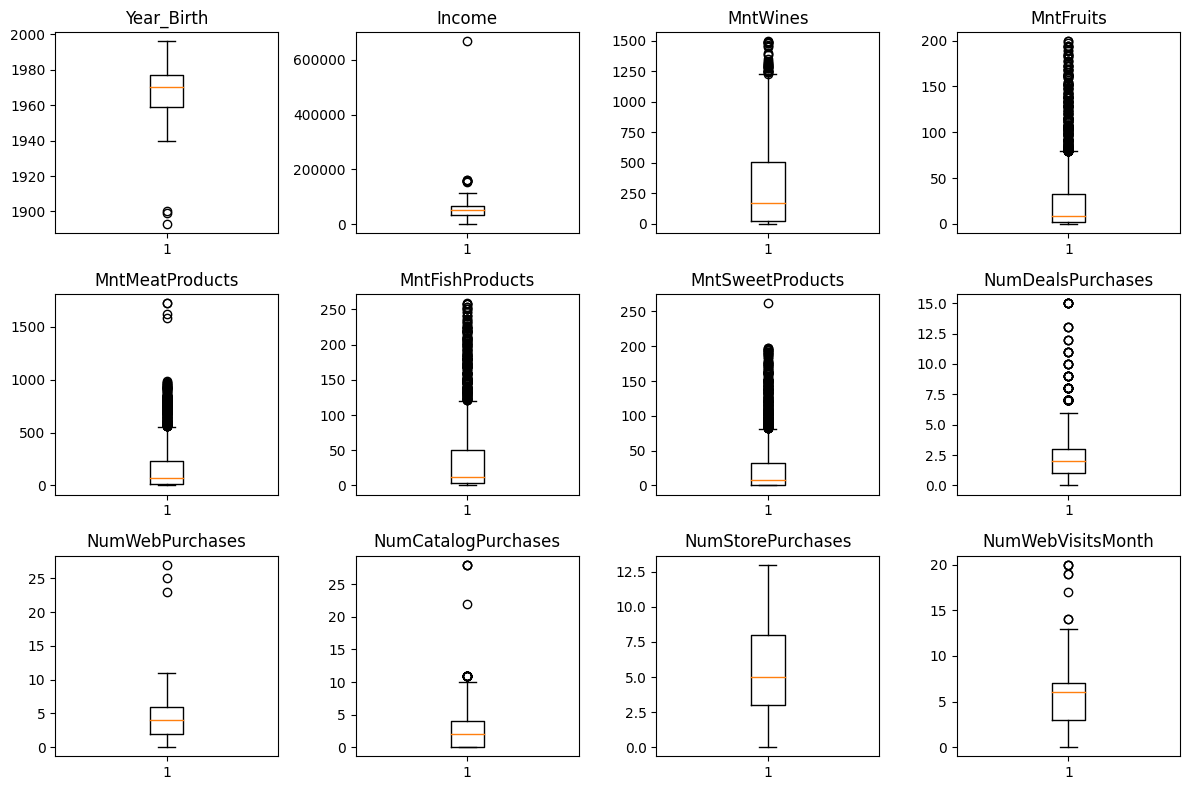

In [11]:
# 대표적인 이상치 제거 방법 Tukey's Fence 라는 IQR을 활용하는 방법과
# 정규분포를 활용하여 임의로 정한 Z-Score값에서 벗어나는 값들을 찾는 방법이 있다.
# 우선 범주형 변수의 빈도부터 확인한다
display(df['Marital_Status'].value_counts())
display(df['Kidhome'].value_counts())
display(df['Teenhome'].value_counts())

# 범주형 변수에는 이상치로 발견될 만한 것이 없다.


# 수치형 변수의 이상치는 상자그림을 통해 확인할 수 있다.
# 도화지준비
fig = plt.figure(figsize=(12,8))
# # 위치잡기
fig_Year_Birth = fig.add_subplot(3,4,1)
fig_Income = fig.add_subplot(3,4,2)
fig_MntWines = fig.add_subplot(3,4,3)
fig_MntFruits = fig.add_subplot(3,4,4)
fig_MntMeatProducts = fig.add_subplot(3,4,5)
fig_MntFishProducts = fig.add_subplot(3,4,6)
fig_MntSweetProducts = fig.add_subplot(3,4,7)
fig_NumDealsPurchases = fig.add_subplot(3,4,8)
fig_NumWebPurchases = fig.add_subplot(3,4,9)
fig_NumCatalogPurchases = fig.add_subplot(3,4,10)
fig_NumStorePurchases = fig.add_subplot(3,4,11)
fig_NumWebVisitsMonth = fig.add_subplot(3,4,12)
# # 그래프그리기
fig_Year_Birth.boxplot(df['Year_Birth'].values)
fig_Income.boxplot(df['Income'].values)
fig_MntWines.boxplot(df['MntWines'].values)
fig_MntFruits.boxplot(df['MntFruits'].values)
fig_MntMeatProducts.boxplot(df['MntMeatProducts'].values)
fig_MntFishProducts.boxplot(df['MntFishProducts'].values)
fig_MntSweetProducts.boxplot(df['MntSweetProducts'].values)
fig_NumDealsPurchases.boxplot(df['NumDealsPurchases'].values)
fig_NumWebPurchases.boxplot(df['NumWebPurchases'].values)
fig_NumCatalogPurchases.boxplot(df['NumCatalogPurchases'].values)
fig_NumStorePurchases.boxplot(df['NumStorePurchases'].values)
fig_NumWebVisitsMonth.boxplot(df['NumWebVisitsMonth'].values)
# 타이틀넣기
fig_Year_Birth.set_title('Year_Birth')
fig_Income.set_title('Income')
fig_MntWines.set_title('MntWines')
fig_MntFruits.set_title('MntFruits')
fig_MntMeatProducts.set_title('MntMeatProducts')
fig_MntFishProducts.set_title('MntFishProducts')
fig_MntSweetProducts.set_title('MntSweetProducts')
fig_NumDealsPurchases.set_title('NumDealsPurchases')
fig_NumWebPurchases.set_title('NumWebPurchases')
fig_NumCatalogPurchases.set_title('NumCatalogPurchases')
fig_NumStorePurchases.set_title('NumStorePurchases')
fig_NumWebVisitsMonth.set_title('NumWebVisitsMonth')
# 그래프 보이기
plt.tight_layout()
plt.show()




In [13]:
display(df.columns)

Index(['ID', 'Year_Birth', 'Marital_Status', 'Income', 'Kidhome', 'Teenhome',
       'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts',
       'MntSweetProducts', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth'],
      dtype='object')

Index(['Year_Birth', 'Income', 'MntWines', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'NumDealsPurchases',
       'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
       'NumWebVisitsMonth'],
      dtype='object')

16

12

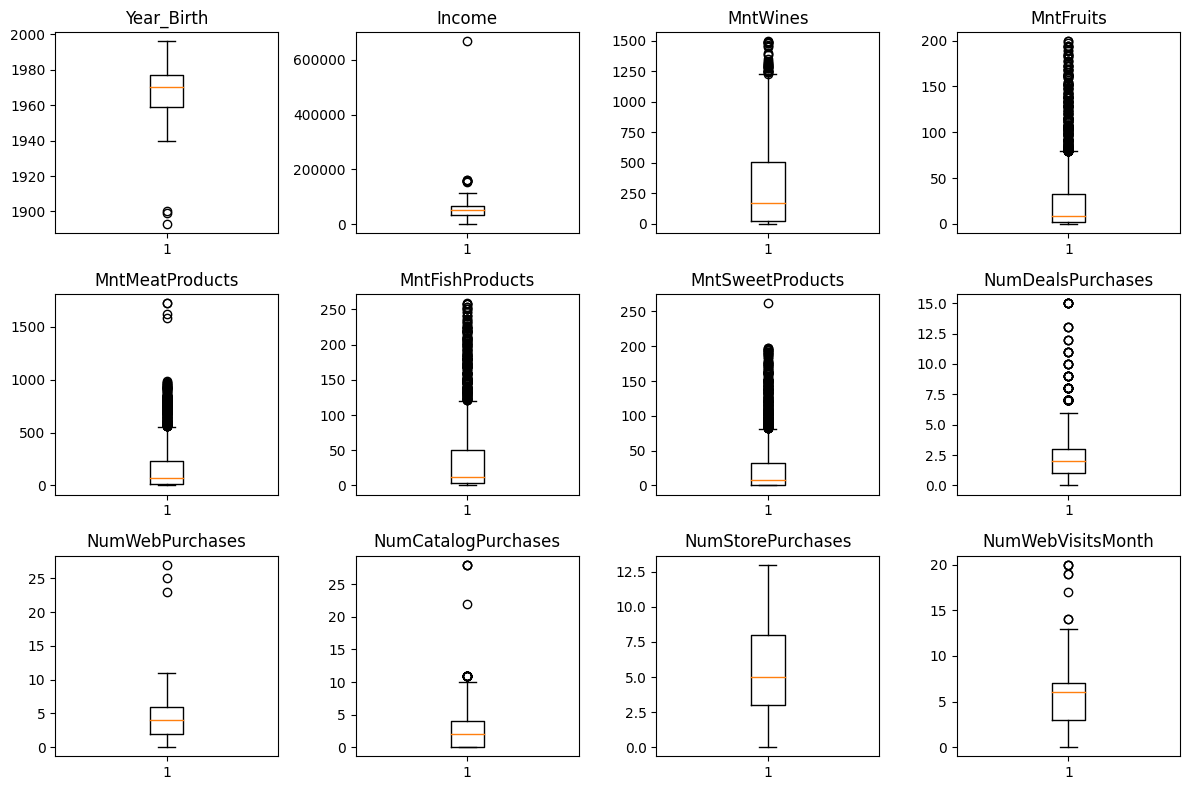

,count
ID,
5524,1
6885,1
3478,1
7494,1
1763,1
...,...
7235,1
3560,1
5278,1


,count
Marital_Status,
Married,857
Together,573
Single,471
Divorced,232
Widow,76
Alone,3
Absurd,2
YOLO,2


,count
Kidhome,
0,1283
1,887
2,46


,count
Teenhome,
0,1147
1,1018
2,51


In [22]:
# 대표적인 이상치 제거 방법 Tukey's Fences 라는 4분위수(IQR)를 활용하는 방법과
# 정규분포를 활용하여 임의로 정한 Z-Score값에서 벗어나는 값들을 찾는 방법이 있다.

# 이상치 탐색

# 수치형 변수 리스트
# int 또는 float dtype의 컬럼만 가져오기
numeric_columns = df.select_dtypes(include=['int', 'float']).columns
# 'ID', 'Kidhome', 'Teenhome'을 drop
numeric_columns = numeric_columns.drop(['ID', 'Kidhome', 'Teenhome'])

# 결과 출력
display(numeric_columns)
display(len(df.columns))
display(len(numeric_columns))

# 도화지 준비 및 상자형 그림 그리기
fig, axes = plt.subplots(3, 4, figsize=(12,8))

# 각 변수에 대해 상자형 그림을 루프를 통해 생성
for col, ax in zip(columns, axes.flatten()) :
  ax.boxplot(df[col].values)
  ax.set_title(col)

# 레이아웃 조정 및 그래프 표시
plt.tight_layout()
plt.show()

# 수치형 변수에는 NumStorePurchases 제외하고
# 거의 모든 변수에서 이상치가 보고된다.

# 범주형 변수들의 경우 빈도를 확인한다.
display(df['ID'].value_counts())
display(df['Marital_Status'].value_counts())
display(df['Kidhome'].value_counts())
display(df['Teenhome'].value_counts())

# 범주형 변수에는 이상치로 발견될 만한 것이 없다.
# 따라서 수치형 변수들에 대해서만 이상치를 제거한다.

In [27]:
# Z-Score값으로이상치 제거
from scipy import stats

# Z-score 임계값 설정
# zscore_threshold = 2.0  # 전체 데이터의 95.5% 에 해당
zscore_threshold = 3.0  # 전체 데이터의 99.7% 에 해당

# Z-score 계산
z_scores = np.abs(stats.zscore(df[numeric_columns]))

# Z-score 임계값을 초과하지 않는 값만 유지 (이상치 제거)
filtered_df = df[(z_scores < zscore_threshold).all(axis=1)]

# 결과 확인
display(filtered_df.head())
display(filtered_df.shape)

# Raw Data : 2240개
# 결측치 제거 후 : 2216개
# 이상치 제거 후 : 1979개
display(1979/2240)  # Raw Data의 약 88.3% 를 정제된 데이터로 사용함


,ID,Year_Birth,Marital_Status,Income,Kidhome,Teenhome,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth
0,5524,1957,Single,58138.0,0,0,635,88,546,172,88,3,8,10,4,7
1,2174,1954,Single,46344.0,1,1,11,1,6,2,1,2,1,1,2,5
2,4141,1965,Together,71613.0,0,0,426,49,127,111,21,1,8,2,10,4
3,6182,1984,Together,26646.0,1,0,11,4,20,10,3,2,2,0,4,6
4,5324,1981,Married,58293.0,1,0,173,43,118,46,27,5,5,3,6,5


(1979, 16)

0.8834821428571429

(3) 전처리한 데이터로 Kmeans, DBSCAN 등의 방법으로 군집 생성

<class 'pandas.core.frame.DataFrame'>
Index: 1979 entries, 0 to 2239
Data columns (total 23 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       1979 non-null   int64  
 1   Year_Birth               1979 non-null   int64  
 2   Income                   1979 non-null   float64
 3   Kidhome                  1979 non-null   int64  
 4   Teenhome                 1979 non-null   int64  
 5   MntWines                 1979 non-null   int64  
 6   MntFruits                1979 non-null   int64  
 7   MntMeatProducts          1979 non-null   int64  
 8   MntFishProducts          1979 non-null   int64  
 9   MntSweetProducts         1979 non-null   int64  
 10  NumDealsPurchases        1979 non-null   int64  
 11  NumWebPurchases          1979 non-null   int64  
 12  NumCatalogPurchases      1979 non-null   int64  
 13  NumStorePurchases        1979 non-null   int64  
 14  NumWebVisitsMonth        1979

None

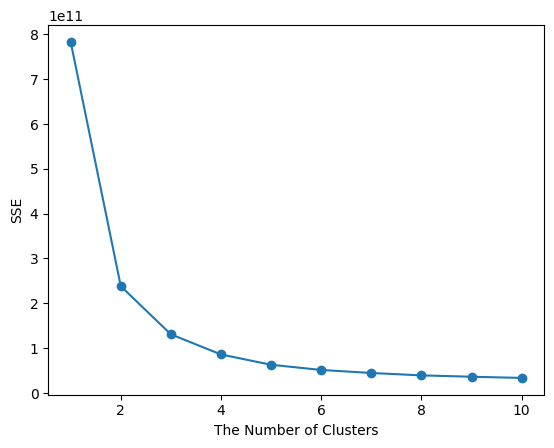

[782965464078.7426, 238097343979.47925, 130887736981.12314, 85942206698.70645, 62994030424.80747, 51411157911.818825, 44671120575.65732, 39329229353.52215, 36279613439.78354, 33650578918.95609]


In [32]:
# 범주형 변수 인코딩
df_dum = pd.get_dummies(filtered_df, columns=['Marital_Status'])
display(df_dum.info())

# Kmeans 의 엘보우 기법 함수 생성
from sklearn.cluster import KMeans
def elbow(X) :
  sse = []    # Sum of Squared Errors(클러스터내 오차 제곱합)
  for i in range(1, 11) : # 1부터 10까지 범위
    km = KMeans(n_clusters=i, random_state=42)
    km.fit(X)
    sse.append(km.inertia_)
  plt.plot(range(1, 11), sse, marker = 'o')
  plt.xlabel('The Number of Clusters')
  plt.ylabel('SSE')
  plt.show()
  print(sse)

elbow(df_dum)

In [33]:
# 엘보우 기법 결과, 최적의 군집 개수는 3개로 보인다.
# 이제 K-means 기법을 사용하여 3개의 군집으로 데이터를 나누어보자
km = KMeans(n_clusters=3, random_state=42)
km.fit(df_dum)

KMeans(n_clusters=3, random_state=42)

In [43]:
# 할당된 군집을 credit 데이터에 추가
new_labels = km.labels_
filtered_df['Cluster'] = new_labels
display(filtered_df.head())

<ipython-input-43-76a8b73d4d96>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Cluster'] = new_labels


,ID,Year_Birth,Marital_Status,Income,Kidhome,Teenhome,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Cluster
0,5524,1957,Single,58138.0,0,0,635,88,546,172,88,3,8,10,4,7,0
1,2174,1954,Single,46344.0,1,1,11,1,6,2,1,2,1,1,2,5,0
2,4141,1965,Together,71613.0,0,0,426,49,127,111,21,1,8,2,10,4,2
3,6182,1984,Together,26646.0,1,0,11,4,20,10,3,2,2,0,4,6,1
4,5324,1981,Married,58293.0,1,0,173,43,118,46,27,5,5,3,6,5,0


# 2. 군집분석

(1) 생성한 군집들의 특성 분석

In [45]:
display(filtered_df['Cluster'].value_counts())
# 3개의 사이즈는 유사하여 군집분석을 통해 적절히 배분되었다고 볼 수 있다

# 개별 클러스터의 평균치 해석
# 수치형 열만 선택하여 클러스터별 평균 계산
numeric_columns = filtered_df.select_dtypes(include=[np.number])

# Cluster 열은 numeric_columns에 포함되지 않기 때문에 따로 처리
numeric_columns['Cluster'] = filtered_df['Cluster']

# 클러스터별 평균 계산
group_mean = numeric_columns.groupby('Cluster').mean().reset_index()

# 결과 출력
display(group_mean)

,count
Cluster,
1,690
0,686
2,603


,Cluster,ID,Year_Birth,Income,Kidhome,Teenhome,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth
0,0,5429.991254,1966.564140,49995.715743,0.453353,0.801749,239.826531,13.323615,76.287172,18.364431,12.838192,2.927114,4.412536,1.905248,5.545190,5.877551
1,1,5645.489855,1973.326087,28161.756522,0.824638,0.302899,27.886957,5.497101,21.524638,8.660870,5.594203,2.065217,2.042029,0.478261,3.079710,6.808696
2,2,5749.895522,1966.565506,73160.358209,0.101161,0.470978,600.742952,44.310116,327.864013,65.121061,46.545605,1.822554,5.558872,4.966833,8.600332,3.507463


In [53]:
# 고객 정보 데이터
group_mean_customer = group_mean[['Cluster', 'Year_Birth', 'Income', 'Kidhome', 'Teenhome']]
display(group_mean_customer)

# 소비 제품 데이터
group_mean_Mnt = group_mean[['Cluster', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts']]
display(group_mean_Mnt)
sum_group_Mnt = np.array(group_mean_Mnt.sum(1))
sum_group_Mnt.reshape(3,1)
group_mean_Mnt/sum_group_Mnt.reshape(3,1)

,Cluster,Year_Birth,Income,Kidhome,Teenhome
0,0,1966.564140,49995.715743,0.453353,0.801749
1,1,1973.326087,28161.756522,0.824638,0.302899
2,2,1966.565506,73160.358209,0.101161,0.470978


,Cluster,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts
0,0,239.826531,13.323615,76.287172,18.364431,12.838192
1,1,27.886957,5.497101,21.524638,8.660870,5.594203
2,2,600.742952,44.310116,327.864013,65.121061,46.545605


,Cluster,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts
0,0.000000,0.665003,0.036944,0.211533,0.050922,0.035598
1,0.014252,0.397455,0.078347,0.306777,0.123438,0.079731
2,0.001841,0.552873,0.040779,0.301738,0.059932,0.042837


In [ ]:
# Cluster[0] : 3개 그룹 중 중간급 수입 집단이며 10대 청소년과 함께 살고 있을 확률이 높다.
# Cluster[0] : 모든 상품군 중 와인 지출이 높다
# Cluster[1] : 3개 그룹 중 가장 낮은 수입 집단이며 어린이와 함께 살고 있을 확률이 높다.
# Cluster[1] : 모든 상품군 중 생선 지출이 높다
# Cluster[2] : 3개 그룹 중 가장 높은 수입 집단이며 어린이나 청소년과 함께 살고 있지 않을 확률이 높다.
# Cluster[2] : 모든 상품군 중 고기 지출이 높다

(2) 각 군집별 상품 추천

In [ ]:
# Cluster[0] : 와인 추천
# Cluster[1] : 생선 추천
# Cluster[1] : 고기 추천

(3) ID가 10870인 고객을 대상으로 상품 추천

In [54]:
filtered_df.loc[filtered_df['ID']==10870]
# 0번 클러스터에 속하므로 와인을 추천하는 것이 좋아 보인다.

,ID,Year_Birth,Marital_Status,Income,Kidhome,Teenhome,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Cluster
2235,10870,1967,Married,61223.0,0,1,709,43,182,42,118,2,9,3,4,5,0


# 통계분석

# 1. 추정 불량률 90%, 오차 한계가 5% 이하가 되도록 최소 표본 사이즈 구하기

In [57]:
# 변수 설정
Z = 1.96  # 95% 신뢰구간에서의 Z값
p = 0.9   # 불량률 90%
E = 0.05  # 오차한계 5%

# 표본크기 계산 공식
n = (Z**2 * p * (1-p)) / (E**2)
print(np.ceil(n))  # 소수점이하 올림
# 정답은 139개이다.

139.0


# 2. 1월~9월까지 은(silver) 가격

In [66]:
df = pd.read_csv('/content/ADP_book_ver01/data/26_problem4.csv')
display(df.head(3))

,1M,2M,3M,4M,5M,6M,7M,8M,9M
0,12.14,42.6,34.4,35.29,30.96,57.12,37.84,42.49,31.38


(1) 은의 가격 및 이동평균값 3이 설정된 시계열 그래프 그리기

,month_price,moving_avg_3
1M,12.14,NaN
2M,42.60,NaN
3M,34.40,29.713333
4M,35.29,37.430000
5M,30.96,33.550000
6M,57.12,41.123333
7M,37.84,41.973333
8M,42.49,45.816667
9M,31.38,37.236667


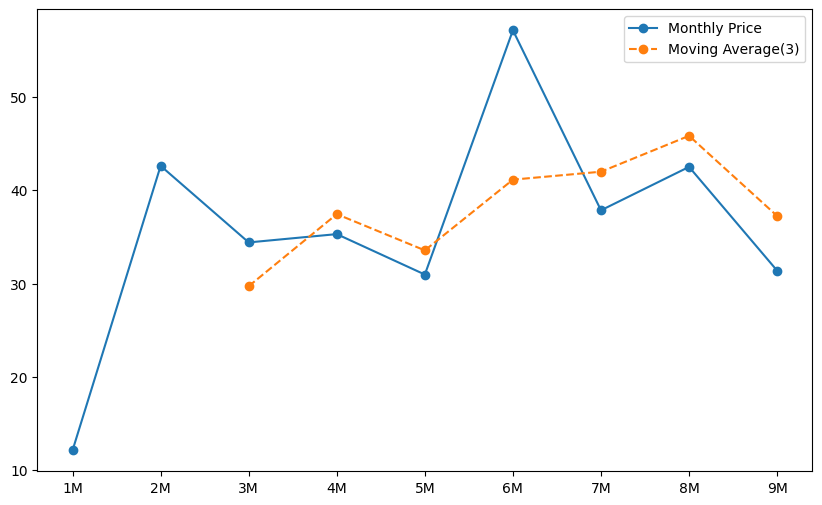

In [68]:
# 파생변수를 추가하기 위한 행과 열 변환
ts = df.transpose()
ts.columns = ['month_price']
# display(ts)

# 이동평균값 계산 (설정값 : 3)
ts['moving_avg_3'] = ts['month_price'].rolling(window=3).mean()
display(ts)

# 그래프 그리기
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.plot(ts.index, ts['month_price'], marker='o', label='Monthly Price')
plt.plot(ts.index, ts['moving_avg_3'], marker='o', linestyle='--', label='Moving Average(3)')
plt.legend()
plt.show()

:(2) 1월 대비 9월의 은의 가격은 몇 % 올랐는가? (소수점 두번째 자리에서 반올림)

In [69]:
# 1월과 9월의 은 가격
price_jan = ts.loc['1M', 'month_price']
price_sep = ts.loc['9M', 'month_price']

# 가격 상승률 계산
price_increase_percentage = ((price_sep - price_jan) / price_jan) * 100
display(round(price_increase_percentage, 2))
# 158.38% 올랐다.

158.48

# 3. 자치구별 찬성, 반대 투표 결과. 자치구별 지지율이 같은지에 대해 검정

In [70]:
table = pd.DataFrame({
    'A' : [176,124],
    'B' : [193,107],
    'C' : [159,141]
},index=['찬성', '반대'])

table

,A,B,C
찬성,176,193,159
반대,124,107,141


In [71]:
# 카이제곱 독립성 검정을 시행한다.
import scipy.stats as stats

chi2, p, dof, expected = stats.chi2_contingency(table)

# 결과 출력
chi2, p

# pvalue가 유의수준 0.05보다 작으므로 귀무가설을 기각한다.
## 즉, 자치구별 지지율은 독립이 아니며, 자치구별 지지율은 다르다고 할 수 있다.

(7.945381231671554, 0.01882272023214683)

# 4. 남녀 평균 혈압차이 여부 (정규분포, 등분산 가정)

In [76]:
df = pd.read_csv('/content/ADP_book_ver01/data/26_problem6.csv')
display(df.head(3), df.shape)
display(df['gender'].value_counts())

,gender,pressure
0,male,106.8
1,male,100.8
2,male,84.5


(25, 2)

,count
gender,
male,16
female,9


(1) 남녀 평균 혈압 차이가 있는지 가설 설정

In [ ]:
# 귀무가설(H0) : 성별에 따른 평균 혈압 차이는 없다
# 대립가설(H1) : 성별에 따른 평균 혈압 차이가 있다

(2) 검정통계량 구하기

In [77]:
# 독립표본 T-검정 시행
import scipy.stats as stats
# 데이터 나누기
male = df.loc[df['gender']=='male', 'pressure']
female = df.loc[df['gender']=='female', 'pressure']
# 독립표본 T-검정
test_result = stats.ttest_ind(male, female, equal_var = True)
test_result
# pvalue가 유의수준 0.05보다 크므로 귀무가설을 기각할 수 없다.
# 즉 성별에 따른 평균 혈압 차이는 업다고 할 수 있다.


TtestResult(statistic=1.3813481801194591, pvalue=0.18044550626193734, df=23.0)

(3) 평균 혈압치의 신뢰구간을 구했을 때, 판단 결과가 검정통계량의 결과를 지지하는지 설명



In [92]:
# 남녀 평균
male_mean = np.mean(male)
female_mean = np.mean(female)
mean_diff = np.abs(male_mean - female_mean)
print('남녀 평균 차이 : ', round(mean_diff, 2))  # 5.3

# 남녀 표준편차
male_std = np.std(male)
female_std = np.std(female)

# 남녀 표본개수
n_male = len(male)
n_female = len(female)

# 남녀간 통합 표준편차(pooled standard deviation)
pooled_std = np.sqrt((male_std**2/ n_male) + (female_std**2 / n_female))

# 자유도와 t값 계산 (95% 신뢰수준, 유의수준 0.05)
df = n_male + n_female - 2
t_value = stats.t.ppf(1 - 0.05 / 2, df)

# 신뢰구간 계산
ci_lower = mean_diff - t_value * pooled_std
ci_upper = mean_diff + t_value * pooled_std

print('최소 신뢰구간 : ', round(ci_lower, 2))
print('최대 신뢰구간 : ', round(ci_upper, 2))

# 남녀 평균 차이 5.3 이 신뢰구간에 포함되므로
# 귀무가설을 지지한다.

남녀 평균 차이 :  5.3
최소 신뢰구간 :  -2.43
최대 신뢰구간 :  13.02


# 5. 20대 남성의 키와 허리둘레가 체중에 영향을 미치는지 여부

In [97]:
df = pd.read_csv('/content/ADP_book_ver01/data/26_problem7.csv')
display(df.head(3))
# display(type(df))

,height,weight,waistline
0,174.396,72.102,79.3787
1,179.656,81.255,80.6649
2,175.079,76.207,80.3166


(1) 회귀계수 구하기

In [98]:
import statsmodels.api as sm

# 독립변수와 종속변수 설정
X = df[['height', 'waistline']]  # 독립변수
y = df['weight']  # 종속변수

# 상수항 추가 (절편을 포함하기 위해)
X = sm.add_constant(X)

# 회귀 모델 적합
model = sm.OLS(y, X).fit()

# 회귀계수 출력
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 weight   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     321.6
Date:                Mon, 30 Sep 2024   Prob (F-statistic):           1.44e-84
Time:                        05:31:12   Log-Likelihood:                -795.97
No. Observations:                 411   AIC:                             1598.
Df Residuals:                     408   BIC:                             1610.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -125.9566     30.471     -4.134      0.000    -185.857     -66.056
height         1.0338      0.059     17.376      0.000       0.917       1.151
waistline      0.2477      0.462      0.536      0.593      -0.661       1.157
==============================================================================
Omnibus:                        1.836   Durbin-Watson:                   1.971
Prob(Omnibus):                  0.399   Jarque-Bera (JB):                1.677
Skew:                           0.066   Prob(JB):                        0.432
Kurtosis:                       3.284   Cond. No.                     7.07e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.07e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
# height 회귀 계수 = 1.0338
# waistline 회귀 계수 = 0.2477

(2) 키 180cm, 허리둘레 85cm 인 남성의 몸무게 측정

In [100]:
# 회귀계수를 활용하여 키 180cm, 허리둘레 85cm인 남성의 몸무게 예측
height = 180
waistline = 85

# 회귀계수 가져오기
intercept = model.params['const']
coef_height = model.params['height']
coef_waistline = model.params['waistline']

# 예측 몸무게 계산
predicted_weight = intercept + coef_height * height + coef_waistline * waistline
predicted_weight
# 추정 몸무게 : 81.18670951112611

81.18670951112611